In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
%%time
!plink --bfile work/binary/h3a_wgs --cluster --out output/mds/h3a_wgs --K 5 --mds-plot 4 --freq


PLINK v1.90b7 64-bit (16 Jan 2023)             www.cog-genomics.org/plink/1.9/
(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to output/mds/h3a_wgs.log.
Options in effect:
  --K 5
  --bfile work/binary/h3a_wgs
  --cluster
  --freq
  --mds-plot 4
  --out output/mds/h3a_wgs

192825 MB RAM detected; reserving 96412 MB for main workspace.
1252340 variants loaded from .bim file.
386 people (0 males, 0 females, 386 ambiguous) loaded from .fam.
Ambiguous sex IDs written to output/mds/h3a_wgs.nosex .
Using up to 15 threads (change this with --threads).
Before main variant filters, 386 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is exactly 1.
--freq: Allele frequencies (founders only) written to output/mds/h3a_wgs.frq .
12523

In [19]:
mds = pd.read_table('output/mds/h3a_wgs.mds', sep='\s+', engine='python')
mds.head()

,FID,IID,SOL,C1,C2,C3,C4
0,H3A-7C44F2,H3A-7C44F2,0,-0.020458,-0.015509,0.020298,-0.003363
1,H3A-B4DD3C,H3A-B4DD3C,0,-0.017071,-0.018189,0.015806,-0.001570
2,H3A-31F23C,H3A-31F23C,0,-0.026211,0.009302,0.010279,0.016774
3,H3A-D3A6FE,H3A-D3A6FE,0,-0.045318,0.010914,-0.020714,-0.007623
4,H3A-0BF47F,H3A-0BF47F,0,-0.020208,-0.016556,0.022030,-0.005979


In [20]:
meta = pd.read_table('/data/vcf/h3awgs/samples.meta.tsv', index_col='SampleID')
meta.head()

,Country,EthnolinguisticGroup,Gender,PI,Project,sourcefile
SampleID,,,,,,
H3A-7C44F2,Guinea,Guinea,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-B4DD3C,Cote D'Ivoire,Cote D'Ivoire,Male,Fowler,Trypanogen,Trypanogen.tsv
H3A-31F23C,Uganda,Uganda,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-D3A6FE,Uganda,Uganda,Female,Fowler,Trypanogen,Trypanogen.tsv
H3A-0BF47F,Guinea,Guinea,Male,Fowler,Trypanogen,Trypanogen.tsv


In [21]:
mds[['Country', 'EthnolinguisticGroup']] = meta[['Country', "EthnolinguisticGroup"]].values
mds.head()

,FID,IID,SOL,C1,C2,C3,C4,Country,EthnolinguisticGroup
0,H3A-7C44F2,H3A-7C44F2,0,-0.020458,-0.015509,0.020298,-0.003363,Guinea,Guinea
1,H3A-B4DD3C,H3A-B4DD3C,0,-0.017071,-0.018189,0.015806,-0.001570,Cote D'Ivoire,Cote D'Ivoire
2,H3A-31F23C,H3A-31F23C,0,-0.026211,0.009302,0.010279,0.016774,Uganda,Uganda
3,H3A-D3A6FE,H3A-D3A6FE,0,-0.045318,0.010914,-0.020714,-0.007623,Uganda,Uganda
4,H3A-0BF47F,H3A-0BF47F,0,-0.020208,-0.016556,0.022030,-0.005979,Guinea,Guinea


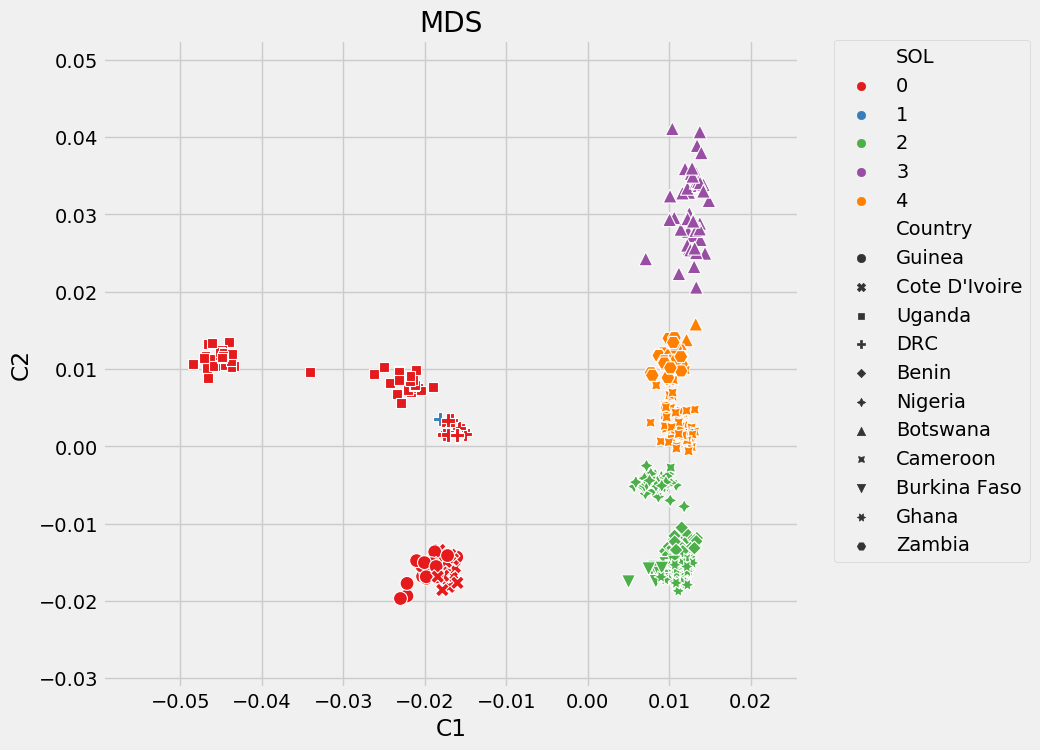

In [25]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

mds_plt = sns.scatterplot(
    x=mds.iloc[:,3], 
    y=mds.iloc[:,4], 
    data=mds, 
    hue=mds.iloc[:,2] ,
    style=mds.iloc[:,7] ,
    palette="Set1",
    s=100
    )
mds_plt.set_title('MDS')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0) 
plt.show()